In [4]:
#bibliotecas necessarias
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import plotly.express as px
import plotly.offline as py
import plotly.graph_objects as go

In [5]:
#diretorios de trabalho
estados_brasileiros = 'D://caiof//Documents//GIT_Repos//Arquiteto_BigData-IGTI//Bases_Dados//datasets//estados_brasileiros.csv'
clientes = 'D://caiof//Documents//GIT_Repos//Arquiteto_BigData-IGTI//Bases_Dados//datasets//amostra_dados_clientes.xlsx'
idade_clientes = 'D://caiof//Documents//GIT_Repos//Arquiteto_BigData-IGTI//Bases_Dados//datasets//idade_clientes.csv'

In [6]:
#coletando dados de estados brasileiros
estados = pd.read_csv(estados_brasileiros, sep=';', encoding='latin-1')
#coletando dados de clientes
clientes = pd.read_excel(clientes)
# coletando dados de idade dos clientes
idade = pd.read_csv(idade_clientes, sep=';', encoding='latin-1')

Analisando dados ausentes

In [7]:
#verificando os registros com valores nulos
clientes.loc[clientes['peso'].isnull()]

,id_cliente,peso,colesterol,genero,id_estado
32,33,NaN,188,Masculino,22
41,42,NaN,177,Masculino,20
87,88,NaN,168,Feminino,12


In [8]:
#realizando a media e mediana da variavel peso

media = round(clientes.peso.mean(),2)
mediana = clientes.peso.median()

In [19]:
#verificando valores:

print(f'O valor da media dos pesos é {media}\n O valor da mediana é {mediana}')

O valor da media dos pesos é 142.32
 O valor da mediana é 138.5


In [9]:
#preencheno valores ausentes com a media
(
    clientes
    .peso
    .fillna(media, inplace=True)
)

In [10]:
clientes.sample(20)

,id_cliente,peso,colesterol,genero,id_estado
11,12,188.0,222,Masculino,6
220,221,180.0,219,Masculino,20
208,209,100.0,106,Masculino,14
30,31,169.0,204,Masculino,8
60,61,113.0,129,Feminino,23
42,43,117.0,139,Masculino,4
19,20,133.0,163,Feminino,5
212,213,154.0,191,Feminino,15
72,73,130.0,158,Masculino,2
99,100,102.0,115,Masculino,6


Substituindo variavel categorica

Quando temos uma variavel do tipo categorica, uma abordagem é substituir o valor ausente pela variavel mais frequente encontrada no conjunto de dados.

In [23]:
print(estados.pais.value_counts())

Brasil    22
Name: pais, dtype: int64


In [24]:
#substituindo os valores nulos pelo valor mais frequente no dataset
(
    estados
    .pais
    .fillna('Brasil', inplace=True)

)

In [25]:
estados.isna().sum()

id_estado       0
estado          0
sigla_estado    0
pais            0
dtype: int64

Analisando distribuição dos dados

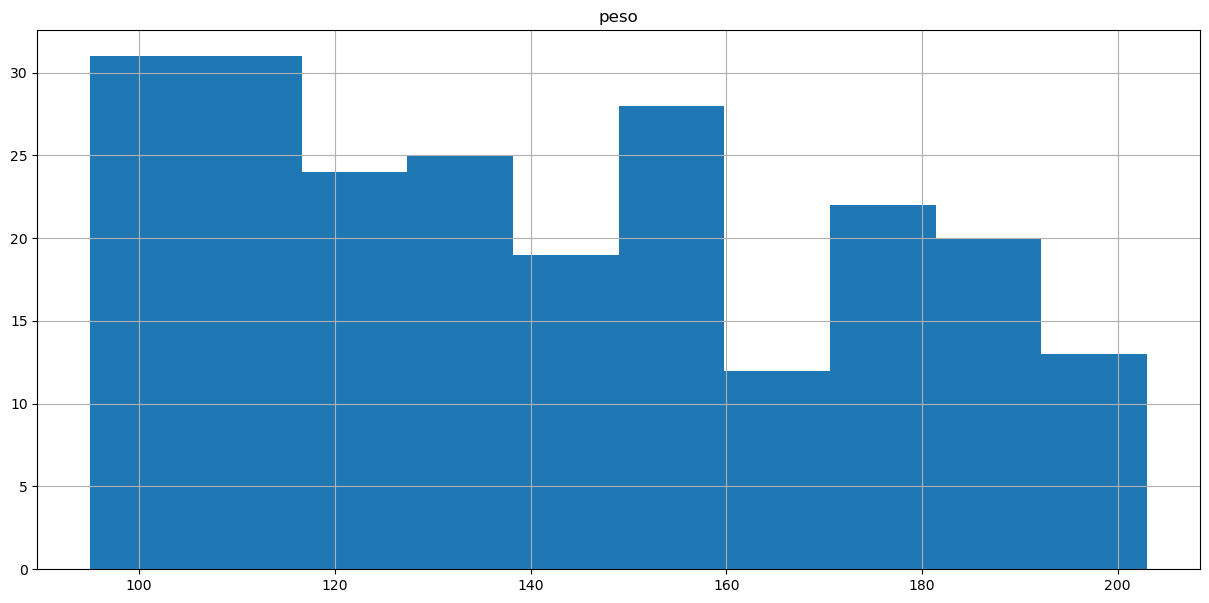

In [26]:
clientes.hist(column= 'peso', figsize= (15,7))
plt.show()


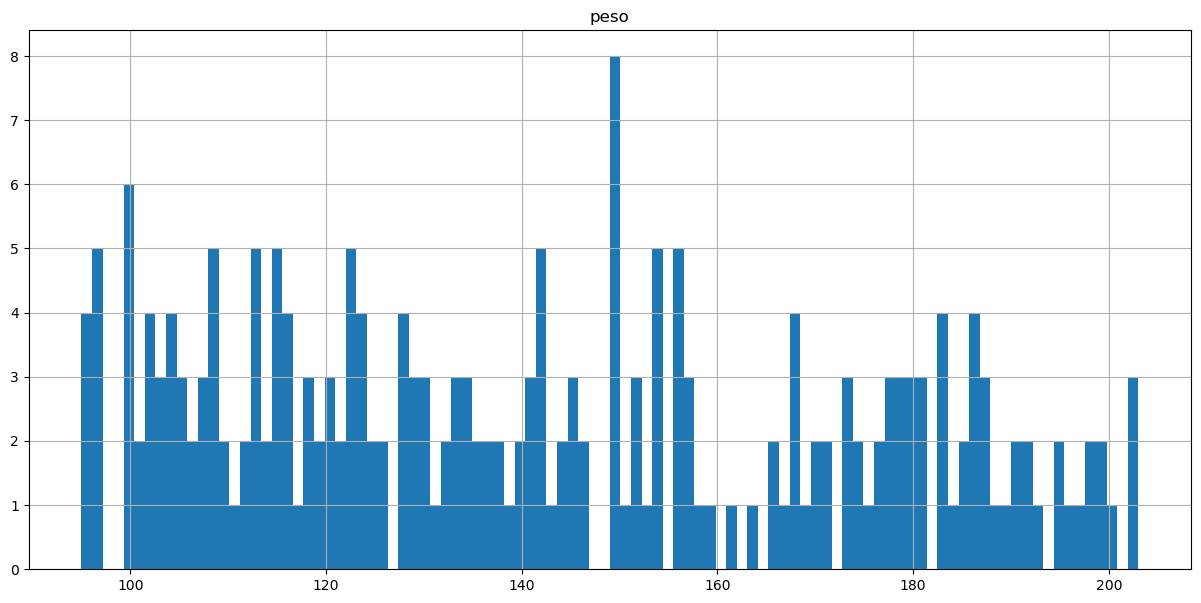

In [27]:
clientes.hist(column= 'peso', figsize= (15,7),bins=100)
plt.show()

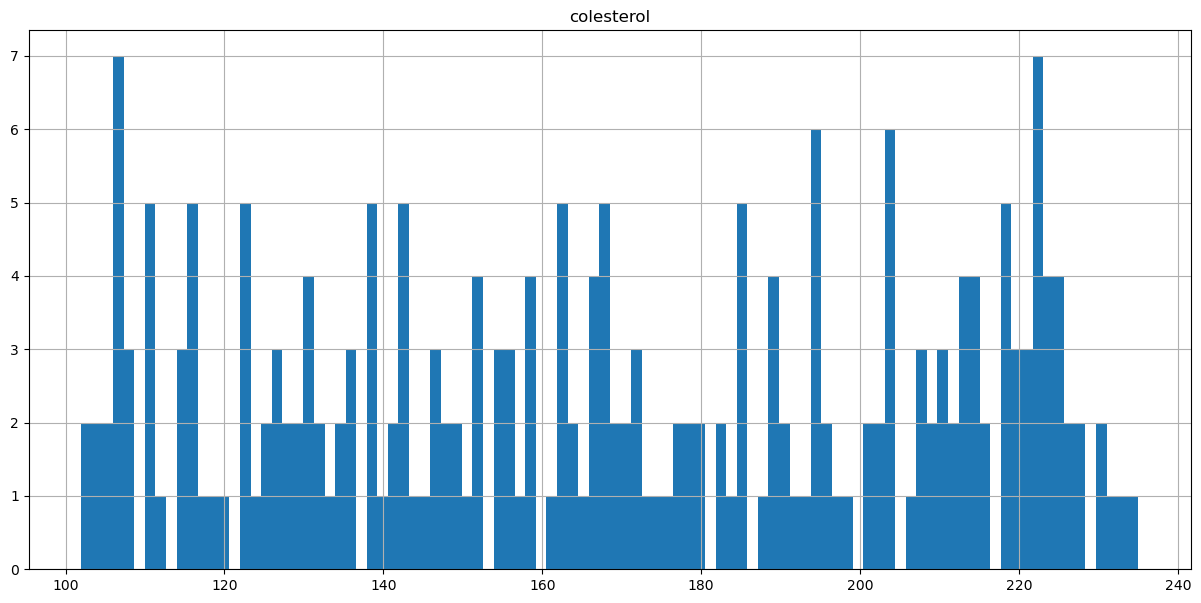

In [28]:
clientes.hist(column= 'colesterol', figsize= (15,7), bins=100)
plt.show()

In [29]:
#criando um identificador para a variavel genero

In [30]:
LE = LabelEncoder()
clientes['genero_number'] = LE.fit_transform(clientes['genero'])

In [31]:
clientes

,id_cliente,peso,colesterol,genero,id_estado,genero_number
0,1,102.0,111,Masculino,23,1
1,2,115.0,135,Masculino,7,1
2,3,115.0,136,Masculino,4,1
3,4,140.0,167,Feminino,24,0
4,5,130.0,158,Masculino,26,1
...,...,...,...,...,...,...
220,221,180.0,219,Masculino,20,1
221,222,116.0,138,Feminino,15,0
222,223,144.0,169,Feminino,18,0
223,224,102.0,116,Masculino,6,1


array([[<Axes: title={'center': 'genero_number'}>]], dtype=object)

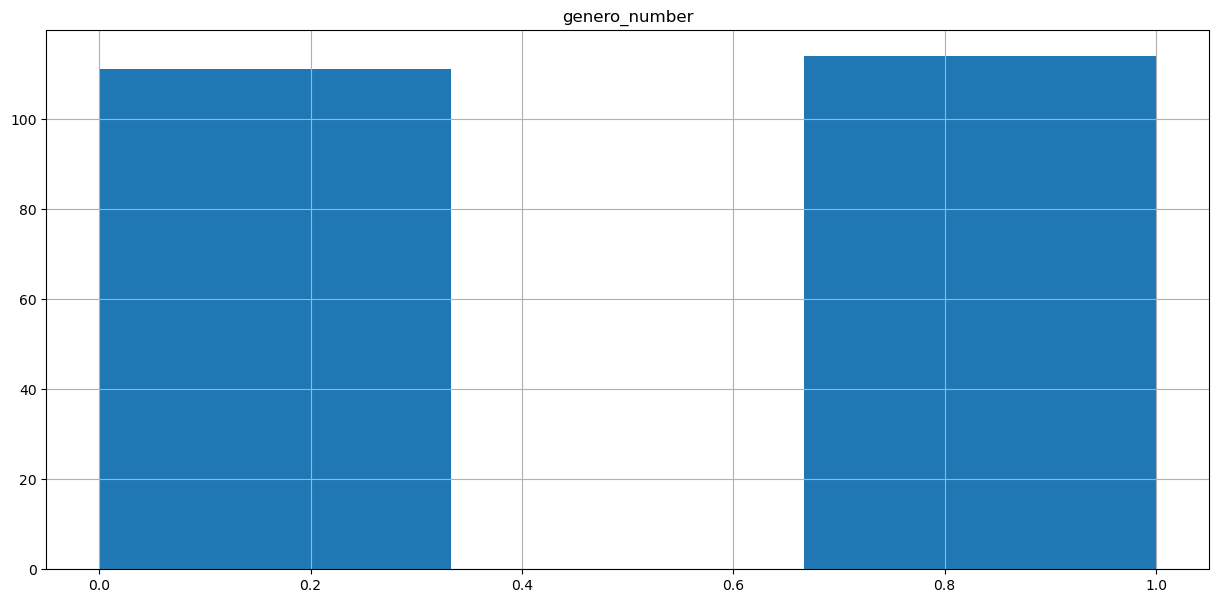

In [32]:
clientes.hist(column= 'genero_number', figsize=(15,7), bins=3)

Junção entre os dados coletados

nessa etapa vamos realizar o merge entre os dados que realizamos a coleta

In [33]:
estados[:5]

,id_estado,estado,sigla_estado,pais
0,1,Acre,ac,Brasil
1,2,Alagoas,al,Brasil
2,3,Amapá,ap,Brasil
3,4,Amazonas,am,Brasil
4,5,Bahia,ba,Brasil


In [34]:
clientes[:5]

,id_cliente,peso,colesterol,genero,id_estado,genero_number
0,1,102.0,111,Masculino,23,1
1,2,115.0,135,Masculino,7,1
2,3,115.0,136,Masculino,4,1
3,4,140.0,167,Feminino,24,0
4,5,130.0,158,Masculino,26,1


In [35]:
#merge dos dados

clientes_estados = pd.merge(clientes, estados, on='id_estado')
clientes_estados.sort_values('id_cliente')

,id_cliente,peso,colesterol,genero,id_estado,genero_number,estado,sigla_estado,pais
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil
9,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil
21,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil
32,4,140.0,167,Feminino,24,0,Santa Catarina,sc,Brasil
39,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil
...,...,...,...,...,...,...,...,...,...
167,221,180.0,219,Masculino,20,1,Rio Grande do Norte,rn,Brasil
126,222,116.0,138,Feminino,15,0,Paraíba,pb,Brasil
196,223,144.0,169,Feminino,18,0,Piauí,pi,Brasil
77,224,102.0,116,Masculino,6,1,Ceará,ce,Brasil


In [36]:
#realiza juncao entre clientes e idades

base_completa = (
    pd
    .merge(clientes_estados, idade, on='id_cliente')
    .sort_values('id_cliente')
)

base_completa.sample(15)

,id_cliente,peso,colesterol,genero,id_estado,genero_number,estado,sigla_estado,pais,idade
72,138,203.0,231,Masculino,6,1,Ceará,ce,Brasil,39
126,222,116.0,138,Feminino,15,0,Paraíba,pb,Brasil,38
70,100,102.0,115,Masculino,6,1,Ceará,ce,Brasil,20
122,166,120.0,144,Feminino,15,0,Paraíba,pb,Brasil,29
174,192,126.0,149,Feminino,13,0,Minas Gerais,mg,Brasil,53
207,208,110.0,127,Masculino,9,1,Goiás,go,Brasil,35
5,164,133.0,155,Feminino,23,0,Roraima,rr,Brasil,51
158,194,116.0,136,Feminino,21,0,Rio Grande do Sul,rs,Brasil,35
58,136,156.0,195,Feminino,25,0,São Paulo,sp,Brasil,59
73,139,141.0,172,Feminino,6,0,Ceará,ce,Brasil,35


In [37]:
#deletar o index que esta bagunçado e criar um novo. 
base_completa.reset_index(drop=True)

,id_cliente,peso,colesterol,genero,id_estado,genero_number,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil,17
1,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil,28
2,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil,62
3,4,140.0,167,Feminino,24,0,Santa Catarina,sc,Brasil,55
4,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil,44
...,...,...,...,...,...,...,...,...,...,...
220,221,180.0,219,Masculino,20,1,Rio Grande do Norte,rn,Brasil,33
221,222,116.0,138,Feminino,15,0,Paraíba,pb,Brasil,38
222,223,144.0,169,Feminino,18,0,Piauí,pi,Brasil,24
223,224,102.0,116,Masculino,6,1,Ceará,ce,Brasil,31


Organizando a base de dados

Podemos realizar varias alterações na base de dados a fim de melhorar o entendimento e disposição das colunas, alem disso podemos fazer transformações nos textos das linhas e colunas

In [38]:
#alterando o nome das colunas 
(
    base_completa
    .rename(columns={
        'id_cliente': 'cod_cliente',
        'genero_number': 'cod_genero'},
        inplace=True)
)

base_completa

,cod_cliente,peso,colesterol,genero,id_estado,cod_genero,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil,17
9,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil,28
21,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil,62
32,4,140.0,167,Feminino,24,0,Santa Catarina,sc,Brasil,55
39,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil,44
...,...,...,...,...,...,...,...,...,...,...
167,221,180.0,219,Masculino,20,1,Rio Grande do Norte,rn,Brasil,33
126,222,116.0,138,Feminino,15,0,Paraíba,pb,Brasil,38
196,223,144.0,169,Feminino,18,0,Piauí,pi,Brasil,24
77,224,102.0,116,Masculino,6,1,Ceará,ce,Brasil,31


In [39]:
#alterando as linhas da variavel sigla_estado para miusculas
base_completa['sigla_estado'] = (
    base_completa
    .sigla_estado
    .str
    .upper()
)

base_completa

,cod_cliente,peso,colesterol,genero,id_estado,cod_genero,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,RR,Brasil,17
9,2,115.0,135,Masculino,7,1,Distrito Federal,DF,Brasil,28
21,3,115.0,136,Masculino,4,1,Amazonas,AM,Brasil,62
32,4,140.0,167,Feminino,24,0,Santa Catarina,SC,Brasil,55
39,5,130.0,158,Masculino,26,1,Sergipe,SE,Brasil,44
...,...,...,...,...,...,...,...,...,...,...
167,221,180.0,219,Masculino,20,1,Rio Grande do Norte,RN,Brasil,33
126,222,116.0,138,Feminino,15,0,Paraíba,PB,Brasil,38
196,223,144.0,169,Feminino,18,0,Piauí,PI,Brasil,24
77,224,102.0,116,Masculino,6,1,Ceará,CE,Brasil,31


Alterando a disposição das colunas do arquivo de dados

Vamos alterar as disposições das colunas no nosso conjunto de dados a fim de facilitar a visualização 

In [40]:
base_completa = base_completa[['cod_cliente','genero','idade', 'peso', 'colesterol', 'id_estado',
       'estado','cod_genero' , 'sigla_estado', 'pais']]

base_completa

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,cod_genero,sigla_estado,pais
0,1,Masculino,17,102.0,111,23,Roraima,1,RR,Brasil
9,2,Masculino,28,115.0,135,7,Distrito Federal,1,DF,Brasil
21,3,Masculino,62,115.0,136,4,Amazonas,1,AM,Brasil
32,4,Feminino,55,140.0,167,24,Santa Catarina,0,SC,Brasil
39,5,Masculino,44,130.0,158,26,Sergipe,1,SE,Brasil
...,...,...,...,...,...,...,...,...,...,...
167,221,Masculino,33,180.0,219,20,Rio Grande do Norte,1,RN,Brasil
126,222,Feminino,38,116.0,138,15,Paraíba,0,PB,Brasil
196,223,Feminino,24,144.0,169,18,Piauí,0,PI,Brasil
77,224,Masculino,31,102.0,116,6,Ceará,1,CE,Brasil


analise dos dados

é a etapa onde selecionamos os algoritmos de machine learning que serão inseridos para alcançar o resultado,
levando em consideração o conjunto de dados obtidos na etapa anterior.
Para esse trabalho, vamos realizar um agrupamento de pessoas baseados no colesterol, peso e idade das pessoas

Aplicando Metodo cotovelo
Vamos iniciar visualizando, identificando o numero de clusters necessarios para realizar o agrupamento

In [41]:
def calcular_wcss(dados_cliente):
    wcss = []
    for k in range(1,11):
        kmeans = KMeans(n_clusters= k)
        kmeans.fit(X=dados_cliente)
        wcss.append(kmeans.inertia_)
    
    return wcss


In [42]:
dados_cliente = base_completa[['peso','colesterol','idade']]
dados_cliente.head(10)

,peso,colesterol,idade
0,102.0,111,17
9,115.0,135,28
21,115.0,136,62
32,140.0,167,55
39,130.0,158,44
47,198.0,227,17
40,114.0,131,30
56,145.0,176,30
61,191.0,223,34
66,186.0,221,55


In [43]:
wcss_clientes = calcular_wcss(dados_cliente)

d:\caiof\Programs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



d:\caiof\Programs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

d:\caiof\Programs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

d:\caiof\Programs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

d:\caiof\Programs\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [44]:
#visualizar os dados obtidos do wcss
for i in range(len(wcss_clientes)):
    print(f'o cluster {i} possui valor de WCSS de: {wcss_clientes[i]}')

o cluster 0 possui valor de WCSS de: 615755.6435484445
o cluster 1 possui valor de WCSS de: 189212.54409773237
o cluster 2 possui valor de WCSS de: 110985.62659521376
o cluster 3 possui valor de WCSS de: 85993.49644839711
o cluster 4 possui valor de WCSS de: 72520.63211401357
o cluster 5 possui valor de WCSS de: 60540.005805249835
o cluster 6 possui valor de WCSS de: 49320.43946765289
o cluster 7 possui valor de WCSS de: 42303.92724010217
o cluster 8 possui valor de WCSS de: 36760.120541248536
o cluster 9 possui valor de WCSS de: 31550.508328678494


Visualizando o grafico cotovelo

In [45]:
grafico_wcss = px.line(x= range(1,11),y= wcss_clientes)
fig = (
    go
    .Figure(grafico_wcss)
    .update_layout(
        title= 'calculando wcss',
        xaxis_title= 'numero de clusters',
        yaxis_title= 'valor do wcss',
        template= 'plotly_white'

    )
)

fig.show()

parei em 6:20

168.73